# Birds Sounds Analysis
#### Group : Les Viz'Iteurs

## Aim

In this Notebook, we're going to present you our early work concerning the birds sounds analysis. We think it might represent powerfull clues to understand the potential of Kasios pollution in the Natural Reserve.



## Plan

- We'll first briefly present the usefull concepts for this analysis
- Then we will show you how we've used those techniques in a simple way
- We'll also show you how improvements of this solutions can already lead to decent results
- Finally, we'll also show you possible evolution toward automated neural network based solution than could be fully develloped if your first solution doesn't prove to be sufficient enough 


## I. Concepts

### Time representation

When listening to birdsong, we can easily that each song has a distinct rhythmic and melodic structure. 

Songs of individual birds from same species sound similar to each other and differ from those of other species.

Quiet early in history, we've used the sonogram to transform a sound into a simple static visual image revealing the time-frequency structure of each song syllable. 

Sonogram images can be measured, analyzed, and compared with one another. This allows the researcher to quantify the degree of similarity between different songs by inspecting (or cross-correlating) sonograms and categorizing song syllables into distinct types. 

When recording a singing bird, the microphone capture tiny fluctuations in air pressure we call sound waves and turn those into an electrical current, which might look like this:

<img src="sonogram.png" alt="drawing" width="700"/>


As we can see, the bird call does not look like a simple wave. That is because it is composed of several differents frequencies, or several "pure waves"

<img src="Decomposed.png" alt="drawing" width="500"/>




### Frequential Representation

Then, appeared the fast Fourier transform (FFT) : an algorithm to compute the periodic structure in the signal, and representing it by a set of sine waves, called frequencies. Plotting the power of each one of those frequencies for the previous bird sound gives :

<img src="FFT.png" alt="drawing" width="500"/>


More exactly, the bird sound was composed of different frequences, as shown after. These are the different peaks we can see on the Power Spectrum above


Then, we finally repeat this procedure for overlapping time windows and use an appropriate color set to represent the evolution of frequencies and their "intensity" over the full sample.

<img src="SpectroBuilding.png" alt="drawing" width="900"/>


## II. First Results

### Basic Time representation of a Blue Pipit call

- We create the documen name from the CSV file content.
- We pick one of the record
- We loads and decodes the audio as a time series y, represented as a one-dimensional NumPy floating point array. 
- The variable sr contains the sampling rate of y, that is, the number of samples per second of audio.


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import np_utils
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.model_selection import train_test_split

from matplotlib.pyplot import specgram
from keras.utils import np_utils





train=pd.read_csv('AllBirdsv4.csv')
train.rename(columns={'File ID': 'File_ID'}, inplace=True)

def parser_2(row) :
    File_ID = str(train[row:row+1].File_ID.item())
    English_name = str(train[row:row+1].English_name.item()).replace(" ", "-")
    filename = 'ALL BIRDS/'+English_name+'-'+File_ID+'.mp3'
    print(filename)
    y,sr=librosa.load(filename)
    return y, sr

y, sr = parser_2(15)

ALL BIRDS/Rose-crested-Blue-Pipit-298739.mp3


In [3]:
train=pd.read_csv('AllBirdsv4.csv')
train.rename(columns={'File ID': 'File_ID'}, inplace=True)

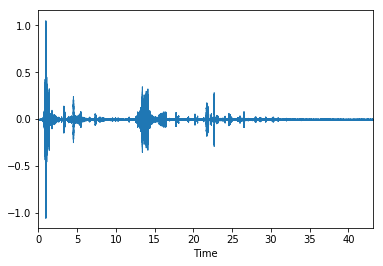

In [4]:
librosa.display.waveplot(y)
tempo_Bpipit, beat_frames_Bpipit = librosa.beat.beat_track(y, sr)

ALL BIRDS/Rose-crested-Blue-Pipit-402254.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-406171.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-405901.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-405548.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-401782.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-401720.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-401719.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-387404.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-377874.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-368493.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-368492.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-364567.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-353709.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-351273.mp3
ALL BIRDS/Rose-crested-Blue-Pipit-299736.mp3


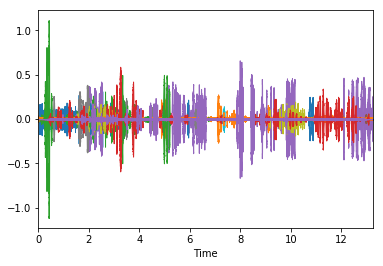

In [5]:
Y = []
Tempo = []
FFT = []

for i in range(15):
    y, sr = parser_2(i)
    fft = np.abs(librosa.stft(y))
    tempo, beat_frames = librosa.beat.beat_track(y, sr)
    Y.append(y)
    FFT.append(fft)
    Tempo.append(tempo)
    librosa.display.waveplot(y)
    #print(1)

### Basic Time representation of a Blue Pipit call


ALL BIRDS/Rose-crested-Blue-Pipit-401720.mp3


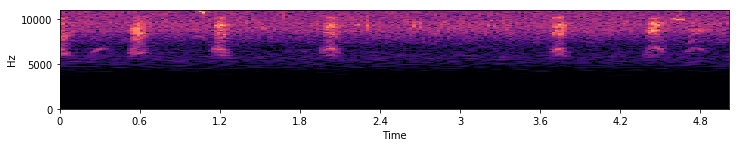

In [9]:
y, sr = parser_2(5)
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([30, 35])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='linear', x_axis='time')


### First Approach : Manual Filtering and spectrum

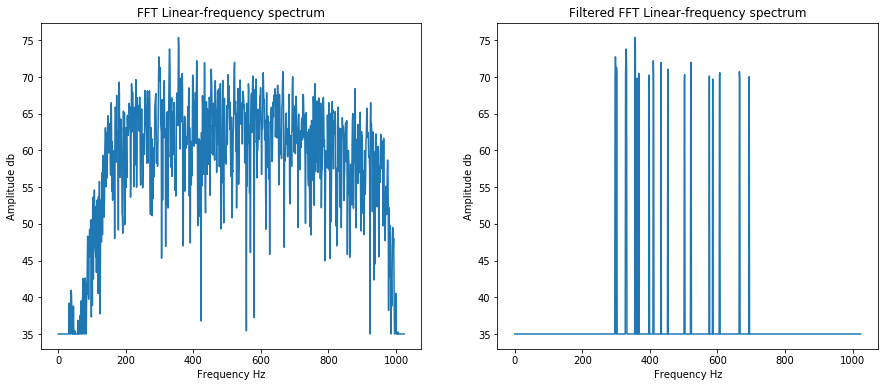

In [34]:
Sound = 6
FFT_db = [librosa.amplitude_to_db(FFT[i], ref=0.00002) for i in range (len(FFT))]
Filtered_FFT = [librosa.amplitude_to_db(FFT[i], ref = 0.00002) for i in range (len(FFT))]

T = 521

fig = plt.figure(figsize=(15, 6)) 
plt.subplot(121)
plt.plot(FFT_db[Sound][:, T])
plt.ylabel('Amplitude db')
plt.xlabel('Frequency Hz')
plt.title('FFT Linear-frequency spectrum')

for i in range (len(FFT)):
    Filtered_FFT[i][Filtered_FFT[i]<np.percentile(Filtered_FFT[i],95)] = np.min(FFT_db[Sound][:, T])


plt.subplot(122)
plt.plot(Filtered_FFT[Sound][:, T])
plt.ylabel('Amplitude db')
plt.xlabel('Frequency Hz')
plt.title('Filtered FFT Linear-frequency spectrum')
plt.show()

### Representing Simple Spectrogram
Spectrogram is an aggragation of spectrum.
As we add a dimention (time), we add a color scale to represent amplitude (db)

In [35]:
FFT_db = [librosa.amplitude_to_db(FFT[i], ref = 0.00002) for i in range (len(FFT))]

Text(0.5,1,'Filtered FFT Linear-frequency power Spectrogram')

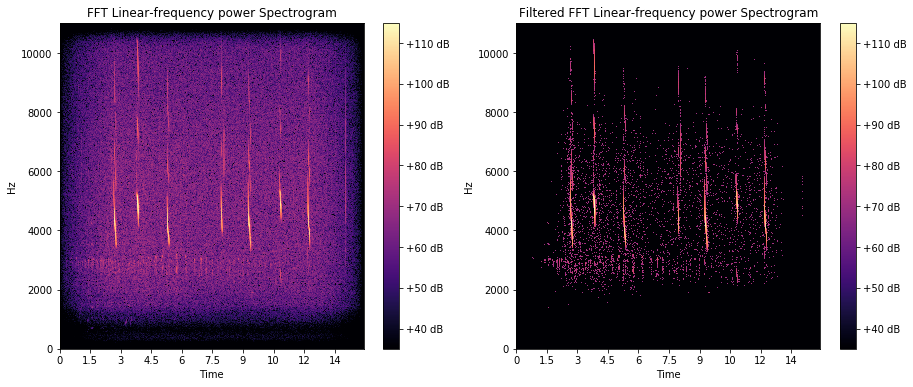

In [36]:
Sound = 6
fig = plt.figure(figsize=(15, 6)) 
plt.subplot(121)
librosa.display.specshow(FFT_db[Sound], y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('FFT Linear-frequency power Spectrogram')
#ie power spectrogram

plt.subplot(122)
librosa.display.specshow(Filtered_FFT[Sound], y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered FFT Linear-frequency power Spectrogram')

#### Filtering harmonics and percusives
Here, we work on the non-filtered FFT.

Text(0.5,1,'Percussive Linear-frequency power spectrogram')

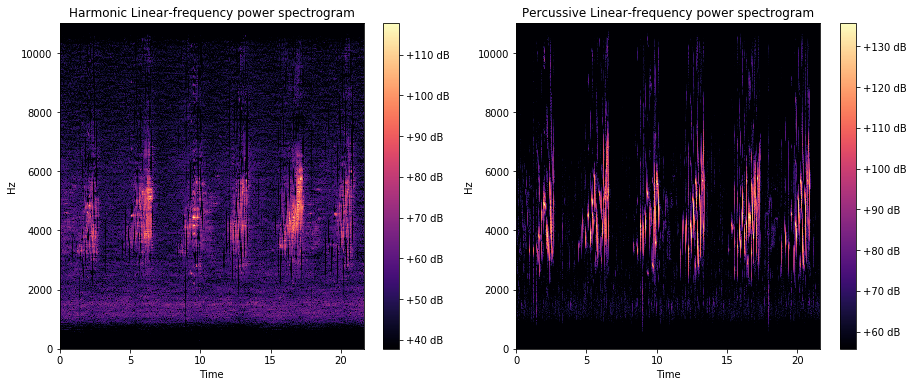

In [37]:
Sound = 4

H1, P1 = librosa.decompose.hpss(FFT[Sound])
H1_db = librosa.amplitude_to_db(H1, ref = 0.00002)
P1_db = librosa.amplitude_to_db(P1, ref = 0.00002)


fig = plt.figure(figsize=(15, 6)) 
plt.subplot(121)
librosa.display.specshow(H1_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic Linear-frequency power spectrogram')

plt.subplot(122)
librosa.display.specshow(P1_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive Linear-frequency power spectrogram')

Comments : Harmonic/Percusive filter helps us understand and visualize data. Indeed, it remove redundant information.
Still, we are not satisfied by this filter because it does not remove noises from the spectogram.</p>
Let's add our amplitude filtering.

Text(0.5,1,'Filtered Percussive Linear-frequency power spectrogram')

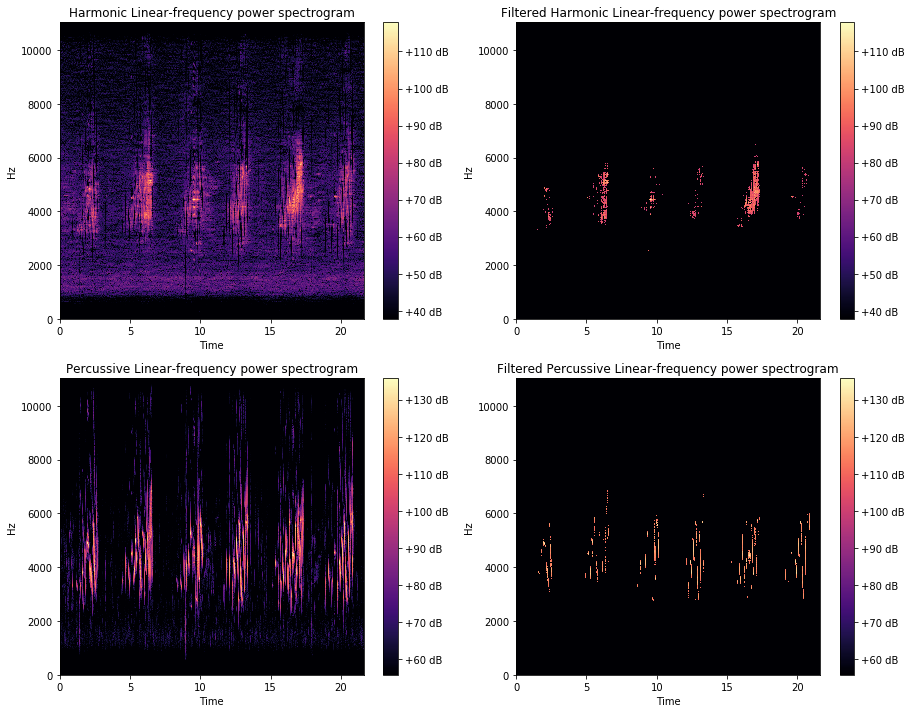

In [38]:
H2, P2 = librosa.decompose.hpss(FFT[Sound])
H2_db = librosa.amplitude_to_db(H2, ref = 0.00002)
P2_db = librosa.amplitude_to_db(P2, ref = 0.00002)

# Amplitude Filters
H2_db[H2_db<np.percentile(H2_db,99)] = np.min(H2_db[:, T])
P2_db[P2_db<np.percentile(P2_db,99)] = np.min(P2_db[:, T])


#Plot
fig = plt.figure(figsize=(15, 12)) 
plt.subplot(2,2,1)
librosa.display.specshow(H1_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic Linear-frequency power spectrogram')


plt.subplot(2,2,2)
librosa.display.specshow(H2_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Harmonic Linear-frequency power spectrogram')


plt.subplot(2,2,3)
librosa.display.specshow(P1_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive Linear-frequency power spectrogram')


plt.subplot(2,2,4)
librosa.display.specshow(P2_db, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Percussive Linear-frequency power spectrogram')

With those filter we can identify a single group of high amplitude harmonic frequencies. This group repeat itself few times as percussive.</p>
This part was about clearly understand the effects of filter and giving intuitions of spectrums.</p>

We are now able to use more sofisticated filters and visualize results.

### First Approach : more efficient filters
#### NN Filter : nearest neighbour

Text(0.5,1,'Filtered Linear-frequency power spectrogram')

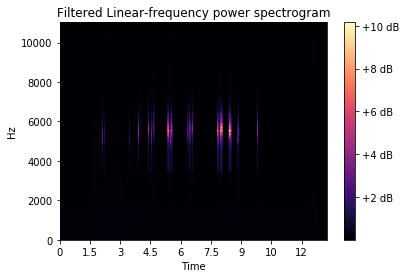

In [39]:
Sound = 6
Filtered_FFT = librosa.decompose.nn_filter(FFT[i])
librosa.display.specshow(Filtered_FFT, y_axis = 'linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Linear-frequency power spectrogram')


The NN_filter use nearest neighbour to remove noises from a song. Here what we observ is only the bird sound. 
Unexpected noises should has been removed.

### Second Approach : Using the CQT Matrix for Filtering

In [40]:
y, sr = parser_2(5)

ALL BIRDS/Rose-crested-Blue-Pipit-401720.mp3


#### Using the CQT Matric

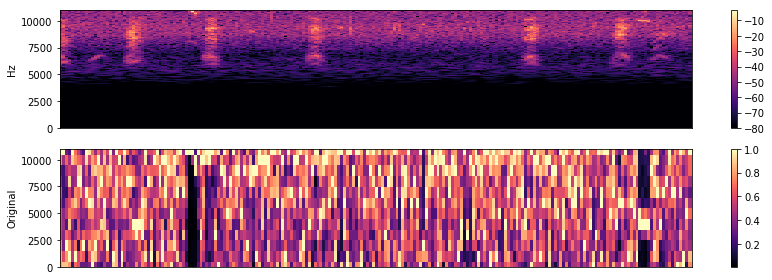

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='linear', bins_per_octave=12*3)
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='linear')
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()

#### Averaging

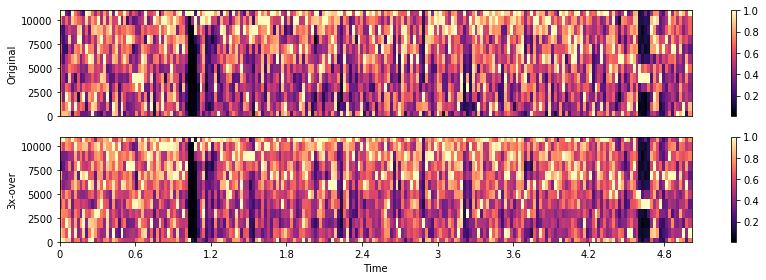

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig[idx], y_axis='linear')
plt.colorbar()
plt.ylabel('Original')


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os[idx], y_axis='linear', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

#### Isolating the harmonics

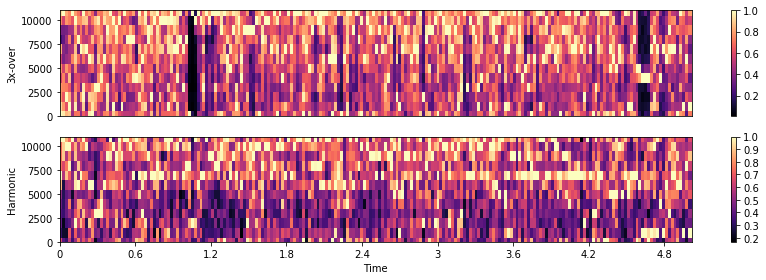

In [43]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os[idx], y_axis='linear')
plt.colorbar()
plt.ylabel('3x-over')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os_harm[idx], y_axis='linear', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic')
plt.tight_layout()

#### Nearest-neighbor smoothing to eliminate passing tones and sparse noise

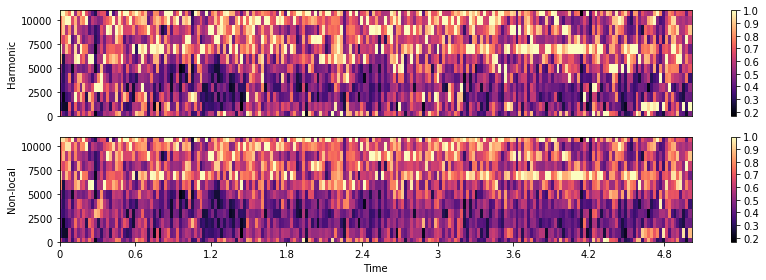

In [44]:
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os_harm[idx], y_axis='linear')
plt.colorbar()
plt.ylabel('Harmonic')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_filter[idx], y_axis='linear', x_axis='time')
plt.colorbar()
plt.ylabel('Non-local')
plt.tight_layout()

#### Local Median Filtering

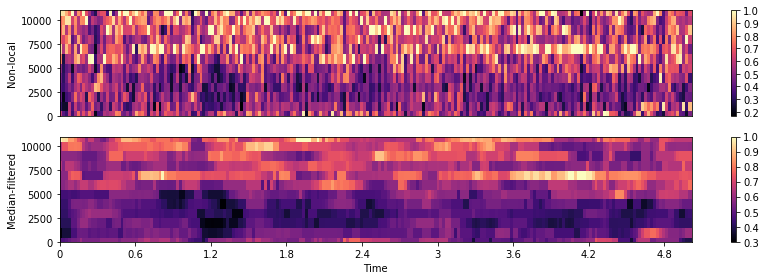

In [45]:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_filter[idx], y_axis='linear')
plt.colorbar()
plt.ylabel('Non-local')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_smooth[idx], y_axis='linear', x_axis='time')
plt.colorbar()
plt.ylabel('Median-filtered')
plt.tight_layout()

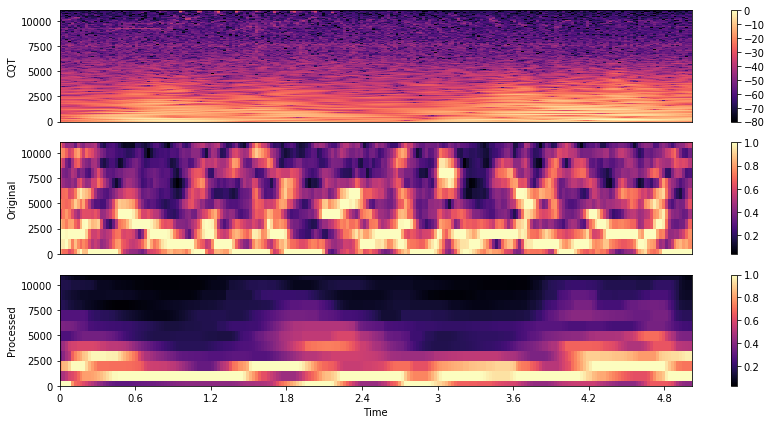

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='linear', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='linear')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='linear', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

ALL BIRDS/Rose-crested-Blue-Pipit-401720.mp3


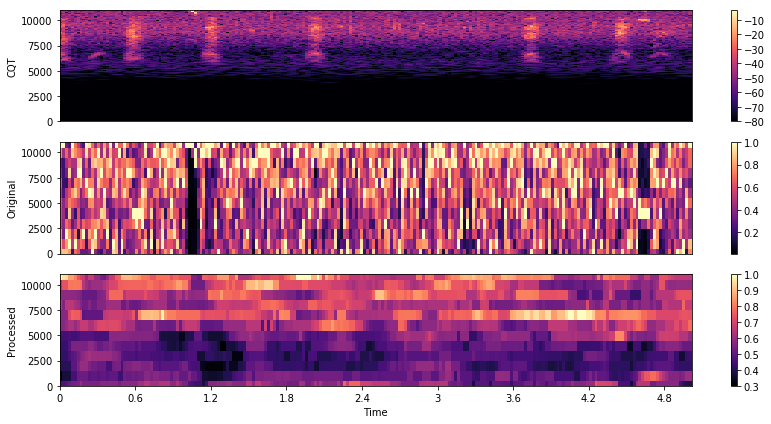

In [52]:
y, sr = parser_2(5)
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([30, 35])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)

chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='linear', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='linear')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='linear', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

ALL BIRDS/Carries-Champagne-Pipit-367479.mp3


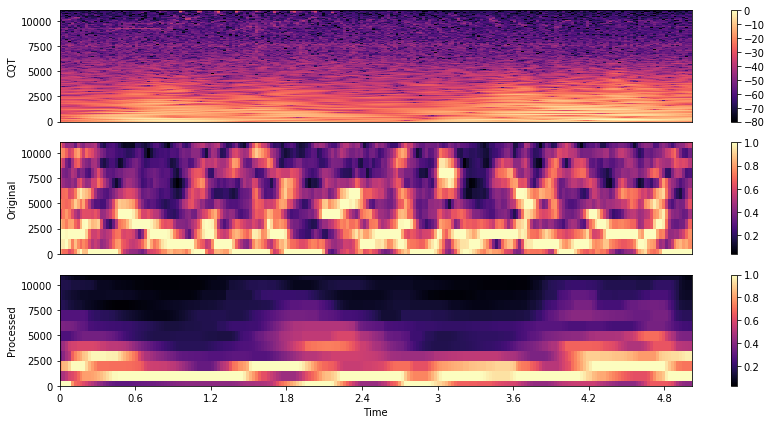

In [51]:
y, sr = parser_2(600)
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([30, 35])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)

chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='linear', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='linear')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='linear', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

## III. Neural Network Recognition


In [17]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

In [18]:
def file_path ():
    sound_file_paths = []
    sound_names = []
    for i in range (0, 500, 3):
        File_ID = str(train[i:i+1].File_ID.item())
        English_name = str(train[i:i+1].English_name.item()).replace(" ", "-")
        filename = 'ALL BIRDS/'+English_name+'-'+File_ID+'.mp3'
        sound_file_paths.append(filename) 
        sound_names.append (English_name)
        #print(filename)
    return sound_file_paths, sound_names

sound_file_paths, sound_names = file_path()

raw_sounds = load_sound_files(sound_file_paths)

In [19]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(sound_file_paths,sound_names):
    features, labels = np.empty((0,193)), np.empty(0)
    for i in range (len(sound_file_paths)):
        mfccs, chroma, mel, contrast,tonnetz = extract_feature(sound_file_paths[i])
        ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        #labels = np.append(sound_names[i])
        i +=1
    return np.array(features), np.array(sound_names, dtype = np.str)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [20]:
features, labels = parse_audio_files(sound_file_paths, sound_names)

C:\Users\piega\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [22]:
nameList = np.unique(labels)
print(labels)
print(nameList)

['Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-Pipit'
 'Rose-crested-Blue-Pipit' 'Rose-crested-Blue-

In [23]:
labels_int = []
for i in range (len(nameList)):
        labels_int += [[i, nameList[i]]]
print(labels_int)

for i in range(len(labels)):
    for j in range (len(labels_int)):
        if (labels[i]==labels_int[j][1]):
            labels[i]=labels_int[j][0]


[[0, 'Blue-collared-Zipper'], [1, 'Bombadil'], [2, 'Broad-winged-Jojo'], [3, 'Canadian-Cootamum'], [4, 'Rose-crested-Blue-Pipit']]


In [24]:
lb = preprocessing.LabelEncoder()
labels=np_utils.to_categorical(lb.fit_transform(labels))

In [27]:
#labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.90
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

In [28]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [29]:
training_epochs = 5000
n_dim = features.shape[1]
n_classes = len(nameList)
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [30]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [31]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))


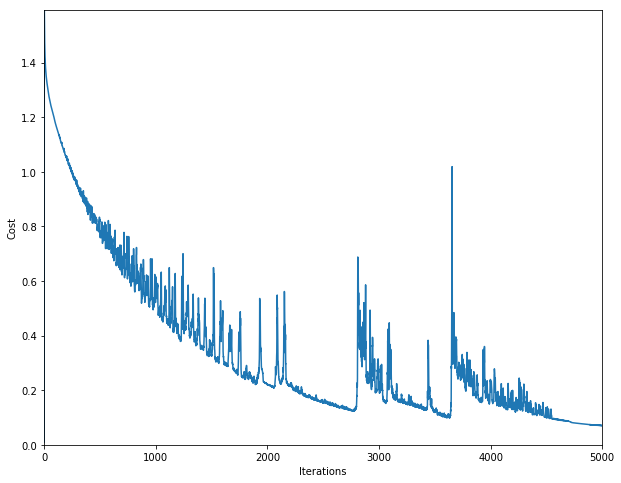

F-Score: 0.5


In [33]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))

#### Short comments and coming works

- We've found many ways to represent the birds sounds
- However they do not look all equivalently efficient to recognize a specific kind of bird
- W've also trained en Neural Network that have a error rate around 10% --> It should be enough to use it on the records provided by Kasios in a short future
- We're also looking forward to train the neural network on filtered sounds.